In [1]:
import pandas as pd

df = pd.read_csv("MELBOURNE_HOUSE_PRICES_LESS.csv")
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,1/04/2017,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council


# Types of data

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63023 entries, 0 to 63022
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         63023 non-null  object 
 1   Address        63023 non-null  object 
 2   Rooms          63023 non-null  int64  
 3   Type           63023 non-null  object 
 4   Price          48433 non-null  float64
 5   Method         63023 non-null  object 
 6   SellerG        63023 non-null  object 
 7   Date           63023 non-null  object 
 8   Postcode       63023 non-null  int64  
 9   Regionname     63023 non-null  object 
 10  Propertycount  63023 non-null  int64  
 11  Distance       63023 non-null  float64
 12  CouncilArea    63023 non-null  object 
dtypes: float64(2), int64(3), object(8)
memory usage: 6.3+ MB


Although `Postcode` is `int64` it must be considered a categorical variable.

# Measure of the center

In [3]:
average = df['Price'].mean()
print(average)

med = df['Price'].median()
print(med)

997898.2414882415
830000.0


# Measure of the variation

In [4]:
standard_deviation = df['Price'].std()
print(standard_deviation)

593498.9190372769


# Graphical way to show the numerical data dristribution

## Boxplot

One approach to represent the data distribution is to find the **Five-Number Summary** of our data:
1. The minimum.
2. The 25th percentile or the first quartile (Q1).
3. The median.
4. The 75th percentile or the third quartile (Q3).
5. The maximum.

## Histogram

/opt/homebrew/Caskroom/miniforge/base/envs/datascience/lib/python3.8/site-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


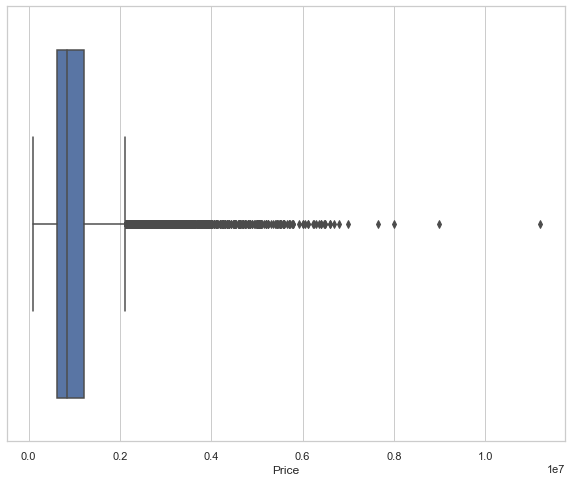

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set(style="whitegrid")
plt.figure(figsize=(10,8))
ax = sns.boxplot(x='Price', data=df, orient="v")

/opt/homebrew/Caskroom/miniforge/base/envs/datascience/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price'>

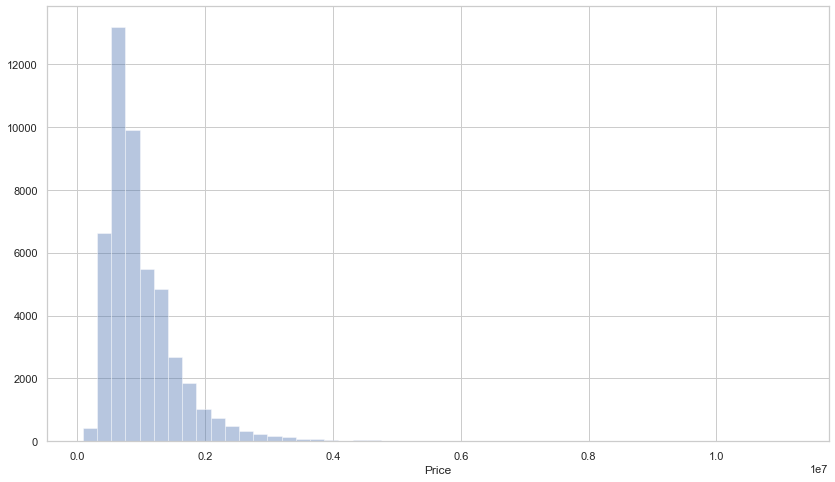

In [7]:
filter_data = df.dropna(subset=['Price'])
plt.figure(figsize=(14,8))
sns.distplot(filter_data['Price'], kde=False)

<AxesSubplot:ylabel='house_type'>

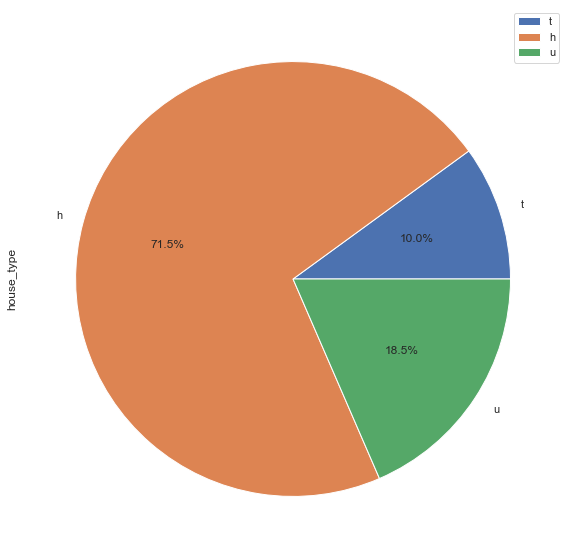

In [9]:
type_counts = df['Type'].value_counts()
df2 = pd.DataFrame({'house_type': type_counts}, 
                     index = ['t', 'h', 'u']
                   )
df2.plot.pie(y='house_type', figsize=(10,10), autopct='%1.1f%%')

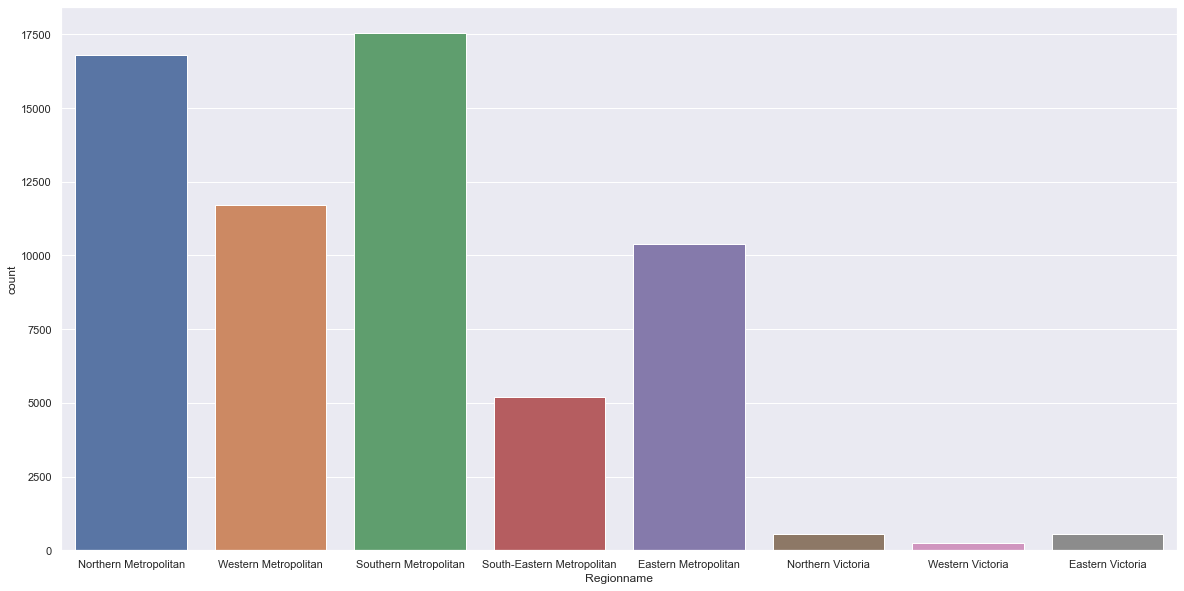

In [10]:
sns.set(style='darkgrid')
plt.figure(figsize=(20,10))
ax = sns.countplot(x='Regionname', data=df)